<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/multi_modal/openai_multi_modal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Modal LLM using OpenAI GPT-4V model for image reasoning

In this notebook, we show how to use OpenAI GPT4V MultiModal LLM class/abstraction for image understanding/reasoning.

We also show several functions we are now supporting for OpenAI GPT4V LLM:
* `complete` (both sync and async): for a single prompt and list of images
* `chat` (both sync and async): for multiple chat messages
* `stream complete` (both sync and async): for steaming output of complete
* `stream chat` (both sync and async): for steaming output of chat

In [ ]:
%pip install llama-index-multi-modal-llms-openai matplotlib

##  Use GPT4V to understand Images from URLs

In [ ]:
import os

OPENAI_API_KEY = "sk-"  # Your OpenAI API token here
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

## Initialize `OpenAIMultiModal` and Load Images from URLs

## 

In [ ]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

from llama_index.core.multi_modal_llms.generic_utils import load_image_urls


image_urls = [
    # "https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg",
    # "https://www.sportsnet.ca/wp-content/uploads/2023/11/CP1688996471-1040x572.jpg",
    "https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg",
    # "https://www.cleverfiles.com/howto/wp-content/uploads/2018/03/minion.jpg",
]

image_documents = load_image_urls(image_urls)

openai_mm_llm = OpenAIMultiModal(model="gpt-4o", max_new_tokens=300)

https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg


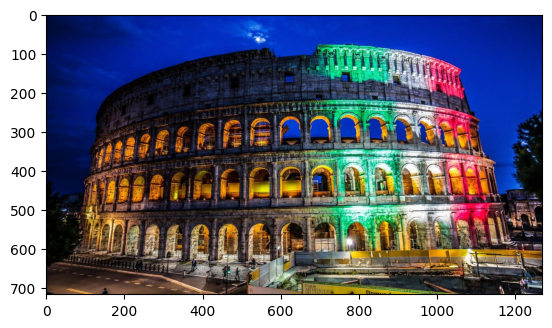

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img_response = requests.get(image_urls[0])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

### Complete a prompt with a bunch of images

In [ ]:
complete_response = openai_mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

In [ ]:
print(complete_response)

The image shows the Colosseum in Rome illuminated at night with the colors of the Italian flag: green, white, and red. The ancient amphitheater's arches are highlighted by the vibrant lights against a deep blue evening sky. The foreground includes a few people walking and some construction barriers.


### Stream Complete a prompt with a bunch of images

In [ ]:
stream_complete_response = openai_mm_llm.stream_complete(
    prompt="give me more context for this image",
    image_documents=image_documents,
)

In [ ]:
for r in stream_complete_response:
    print(r.delta, end="")

The image shows the Colosseum in Rome, Italy, illuminated with the colors of the Italian flag: green, white, and red. This iconic ancient amphitheater is often lit up in national colors for special occasions, celebrations, or events of national significance. The Colosseum is one of the most famous landmarks in the world and a symbol of the architectural and cultural heritage of ancient Rome.

### Chat through a list of chat messages

In [ ]:
from llama_index.multi_modal_llms.openai.utils import (
    generate_openai_multi_modal_chat_message,
)

chat_msg_1 = generate_openai_multi_modal_chat_message(
    prompt="Describe the images as an alternative text",
    role="user",
    image_documents=image_documents,
)

chat_msg_2 = generate_openai_multi_modal_chat_message(
    prompt="The image is a graph showing the surge in US mortgage rates. It is a visual representation of data, with a title at the top and labels for the x and y-axes. Unfortunately, without seeing the image, I cannot provide specific details about the data or the exact design of the graph.",
    role="assistant",
)

chat_msg_3 = generate_openai_multi_modal_chat_message(
    prompt="can I know more?",
    role="user",
)

chat_messages = [chat_msg_1, chat_msg_2, chat_msg_3]
chat_response = openai_mm_llm.chat(
    # prompt="Describe the images as an alternative text",
    messages=chat_messages,
)

In [ ]:
for msg in chat_messages:
    print(msg.role, msg.content)

MessageRole.USER None
MessageRole.ASSISTANT The image is a graph showing the surge in US mortgage rates. It is a visual representation of data, with a title at the top and labels for the x and y-axes. Unfortunately, without seeing the image, I cannot provide specific details about the data or the exact design of the graph.
MessageRole.USER can I know more?


In [ ]:
print(chat_response)

assistant: Certainly! The image shows the Colosseum in Rome illuminated at night. The ancient amphitheater is lit up with the colors of the Italian flag: green, white, and red. The sky is a deep blue, and the structure's arches are prominently visible. There are some people and construction barriers visible in the foreground.


### Stream Chat through a list of chat messages

In [ ]:
stream_chat_response = openai_mm_llm.stream_chat(
    # prompt="Describe the images as an alternative text",
    messages=chat_messages,
)

In [ ]:
for r in stream_chat_response:
    print(r.delta, end="")

Certainly! The image shows the Colosseum in Rome illuminated at night. The ancient amphitheater is lit with the colors of the Italian flag: green, white, and red. The sky is a deep blue, and the structure's arches are prominently visible. There are some people and construction barriers in the foreground.

### Async Complete

In [ ]:
response_acomplete = await openai_mm_llm.acomplete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

In [ ]:
print(response_acomplete)

The image shows the Colosseum in Rome illuminated at night with the colors of the Italian flag: green, white, and red. The ancient amphitheater's arches are highlighted by the vibrant lights against a deep blue evening sky. The foreground includes a few people walking and some construction barriers.


### Async Steam Complete

In [ ]:
response_astream_complete = await openai_mm_llm.astream_complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

In [ ]:
async for delta in response_astream_complete:
    print(delta.delta, end="")

The image shows the Colosseum in Rome illuminated at night with the colors of the Italian flag: green, white, and red. The ancient amphitheater's arches are lit up, creating a striking contrast against the deep blue evening sky. The foreground includes a few people walking and a construction area with barriers.

### Async Chat

In [ ]:
achat_response = await openai_mm_llm.achat(
    messages=chat_messages,
)

In [ ]:
print(achat_response)

assistant: Certainly! The image shows the Colosseum in Rome illuminated at night. The ancient amphitheater is lit with the colors of the Italian flag: green, white, and red. The sky is a deep blue, and the structure's arches are prominently visible, creating a striking contrast with the colorful lights.


### Async stream Chat

In [ ]:
astream_chat_response = await openai_mm_llm.astream_chat(
    messages=chat_messages,
)

In [ ]:
async for delta in astream_chat_response:
    print(delta.delta, end="")

Certainly! The image shows the Colosseum in Rome illuminated at night. The ancient amphitheater is lit up with the colors of the Italian flag: green, white, and red. The sky is a deep blue, and the structure's arches are prominently visible. There are some people walking in the foreground, and construction barriers are visible at the bottom.

## Complete with Two images

In [ ]:
image_urls = [
    "https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg",
    "https://www.sportsnet.ca/wp-content/uploads/2023/11/CP1688996471-1040x572.jpg",
    # "https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg",
    # "https://www.cleverfiles.com/howto/wp-content/uploads/2018/03/minion.jpg",
]

image_documents_1 = load_image_urls(image_urls)

response_multi = openai_mm_llm.complete(
    prompt="is there any relationship between those images?",
    image_documents=image_documents_1,
)
print(response_multi)

There doesn't appear to be any direct relationship between the two images. The first image is a graph showing U.S. mortgage rates and existing home sales over time. The second image is of a person holding a trophy. These images represent different topics: one is about economics and housing, and the other is related to an award or achievement in a different field.


##  Use GPT4V to understand images from local files

In [ ]:
%pip install llama-index-readers-file

In [ ]:
from pathlib import Path
from llama_index.core.readers import SimpleDirectoryReader

# put your local directore here
here = Path().resolve()
image_documents = SimpleDirectoryReader(here / "images_wiki").load_data()

response = openai_mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

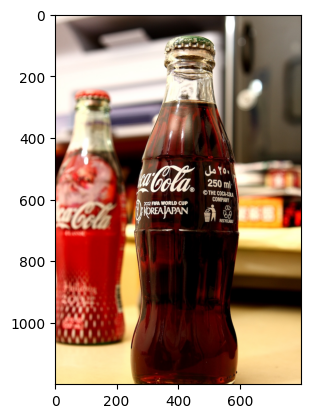

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("./images_wiki/3.jpg")
plt.imshow(img)

In [ ]:
print(response)

A close-up of a Coca-Cola bottle with a 2002 FIFA World Cup Korea Japan logo. The bottle is filled with the dark soda and has a classic contoured shape. In the background, there is another Coca-Cola bottle with a red and white design, slightly out of focus. The setting appears to be indoors, possibly on a desk or table.
